In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename),encoding='utf-8')
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [2]:
df_codes = pd.read_csv('UNSD — Methodology.csv', sep=';', engine='python')

df_codes.head()

,ï»¿Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [3]:
df_merged = df_speech.merge(df_codes, how='left', on='ISO-alpha3 Code')
df_merged = df_merged[["Country or Area", "Year","Region Name","Sub-region Name",'ISO-alpha3 Code',"Least Developed Countries (LDC)", "Session","Speech"]]

df_merged = df_merged.rename(columns={"Year":"year", "Country or Area": "Country name"})
df_merged.head()

,Country name,year,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech
0,Albania,1970,Europe,Southern Europe,ALB,NaN,25,33: May I first convey to our President the co...
1,Argentina,1970,Americas,Latin America and the Caribbean,ARG,NaN,25,177.\t : It is a fortunate coincidence that pr...
2,Australia,1970,Oceania,Australia and New Zealand,AUS,NaN,25,100.\t It is a pleasure for me to extend to y...
3,Austria,1970,Europe,Western Europe,AUT,NaN,25,155.\t May I begin by expressing to Ambassado...
4,Belgium,1970,Europe,Western Europe,BEL,NaN,25,"176. No doubt each of us, before coming up to ..."


**Sentiment analysis > adapt to what we want to do**

In [6]:
happinessdataframe = pd.read_excel('DataForTable2.1.xls') 
happinessdataframe = happinessdataframe[["Country name", "year", "Life Ladder"]]
happinessdataframe.head()

,Country name,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [7]:
##We merge on the value of the country name. So all the names must be exactly the same.
happinessdataframe.replace("Russia", "Russian Federation", inplace=True)
happinessdataframe.replace("United States", "United States of America", inplace=True)
happinessdataframe.replace("Bolivia", "Bolivia (Plurinational State of)", inplace=True)
happinessdataframe.replace("Iran", "Iran (Islamic Republic of)", inplace=True)
happinessdataframe.replace("Turkey", "Türkiye", inplace=True)
happinessdataframe.replace("Turkey", "Türkiye", inplace=True)
happinessdataframe.replace("Congo (Brazzaville)", "Congo", inplace=True)
happinessdataframe.replace("Congo (Kinshasa)", "Congo", inplace=True)
happinessdataframe.replace("South Korea", "Republic of Korea", inplace=True)
happinessdataframe.replace("Laos", "Lao People's Democratic Republic", inplace=True)

happinessdataframe.replace("Vietnam", "Viet Nam", inplace=True)
happinessdataframe.replace("United Kingdom", "United Kingdom of Great Britain and Northern Ireland", inplace=True)
happinessdataframe.replace("Ivory Coast", "Côte d’Ivoire", inplace=True)
happinessdataframe.replace("Moldova", "Republic of Moldova", inplace=True)
happinessdataframe.replace("Tanzania", "United Republic of Tanzania", inplace=True)
happinessdataframe.replace("Syria", "Syrian Arab Republic", inplace=True)

# A few countries are missing because there is no happiness data from them: Papua New Guinea & Democratic People's Republic of Korea

#c#Checking weather the adaptations were succesfull 
happinessdataframe[happinessdataframe["Country name"]=="Russia"]["Country name"]
happinessdataframe[happinessdataframe["Country name"]=="Vietnam"]["Country name"]
happinessdataframe[happinessdataframe["Country name"]=="Tanzania"]["Country name"]

Series([], Name: Country name, dtype: object)

In [8]:
#merge happiness report with merged data set

df_complete = pd.merge(happinessdataframe, df_merged, on =['year','Country name'])
df_complete = df_complete.set_index(['year', 'Country name'])
df_complete.head()


,,Life Ladder,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech
year,Country name,,,,,,,
2008,Afghanistan,3.723590,Asia,Southern Asia,AFG,x,63,Since the last time we \ngathered here in this...
2009,Afghanistan,4.401778,Asia,Southern Asia,AFG,x,64,"First, I would like to \ncongratulate His Exce..."
2010,Afghanistan,4.758381,Asia,Southern Asia,AFG,x,65,I join previous \nspeakers in congratulating y...
2011,Afghanistan,3.831719,Asia,Southern Asia,AFG,x,66,I am honoured to be \nhere to read the stateme...
2012,Afghanistan,3.782938,Asia,Southern Asia,AFG,x,67,"﻿As we speak today, the world\nis being shaken..."


In [9]:
##We label the data with a sentiment analyser and check if the popularity score accuratly arose form that

from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

polarity_score=[]
sentiment_pos=[]
sentiment_neg=[]

for fragment in df_complete["Speech"]:
    ss = sia.polarity_scores(fragment)
    polarity_score.append(ss)
    sentiment_pos.append(ss['pos'])
    sentiment_neg.append(ss['neg'])
    
print(polarity_score)
    

C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#We add it to the data frame

df_complete['polarity_score'] = polarity_score

df_complete['score_neg'] = sentiment_neg
df_complete['score_pos'] = sentiment_pos

the mean of positive score is:  0.1751    The standard deviation of positive score is:  0.03239848312856498


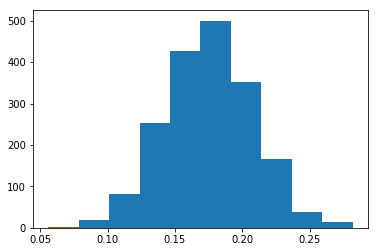

the mean of negative score is:  0.07879027027027027   the standard deviation of the negative score is:   0.0296081368165286


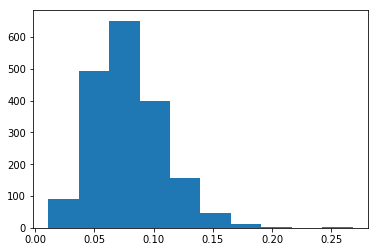

The mean of the total score is:  1.0963097297297297
The standard deviation of the total score is:  0.04861957890752316


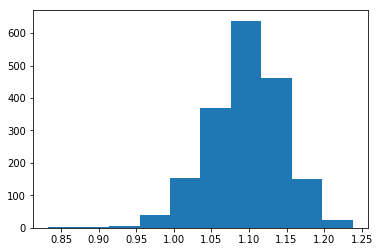

,,Life Ladder,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech,polarity_score,score_neg,score_pos,score
year,Country name,,,,,,,,,,,
2008,Afghanistan,3.723590,Asia,Southern Asia,AFG,x,63,Since the last time we \ngathered here in this...,"{'neg': 0.131, 'neu': 0.667, 'pos': 0.202, 'co...",0.131,0.202,1.071
2009,Afghanistan,4.401778,Asia,Southern Asia,AFG,x,64,"First, I would like to \ncongratulate His Exce...","{'neg': 0.083, 'neu': 0.752, 'pos': 0.165, 'co...",0.083,0.165,1.082
2010,Afghanistan,4.758381,Asia,Southern Asia,AFG,x,65,I join previous \nspeakers in congratulating y...,"{'neg': 0.131, 'neu': 0.649, 'pos': 0.219, 'co...",0.131,0.219,1.088
2011,Afghanistan,3.831719,Asia,Southern Asia,AFG,x,66,I am honoured to be \nhere to read the stateme...,"{'neg': 0.115, 'neu': 0.692, 'pos': 0.192, 'co...",0.115,0.192,1.077
2012,Afghanistan,3.782938,Asia,Southern Asia,AFG,x,67,"﻿As we speak today, the world\nis being shaken...","{'neg': 0.101, 'neu': 0.72, 'pos': 0.178, 'com...",0.101,0.178,1.077


In [14]:
import statistics

print("the mean of positive score is: ",statistics.mean(df_complete['score_pos']), "   The standard deviation of positive score is: ", statistics.stdev(df_complete['score_pos']))

ax = plt.subplot()
ax.hist(df_complete['score_pos'])
plt.show()

print("the mean of negative score is: ",statistics.mean(df_complete['score_neg']), "  the standard deviation of the negative score is:  ",statistics.stdev(df_complete['score_neg']))

ax = plt.subplot()
ax.hist(df_complete['score_neg'])
plt.show()

s = df_complete['score_pos']-df_complete['score_neg']+1
print("The mean of the total score is: ", statistics.mean(s))
print("The standard deviation of the total score is: ", statistics.stdev(s))
ax = plt.subplot()
ax.hist(s)
plt.show()

df_complete['score'] = s
df_complete.head()



C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Coefficient:  [-0.19504544]
R2-score:  -0.0012582912435734617
MSE:        1.2822642626815586


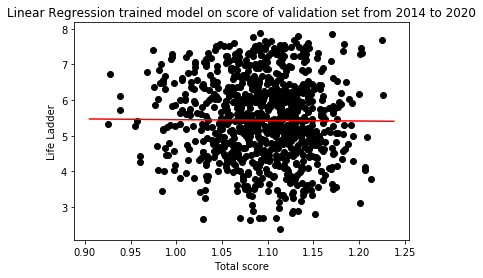

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
import numpy
##LINEAR REGRESSION ON TOTAL SCORE
##trainingset from 2007 to 2013. validation set from 2014 to 2020

#training data
complete_data_2007tot2013 = df_complete.loc[([2007,2008,2009,2010,2011,2012,2013],)]

#finding the outlier: complete_data_2007tot2013['Life Ladder'].idxmin() == (2013, 'Syrian Arab Republic')
#this was the clear outlier in the scatterplot before termination
#as for all our outlier estimations, we first visualised the values and the outliers and then terminated that coordinate
complete_data_2007tot2013.drop((2013, 'Syrian Arab Republic'), axis=0, inplace=True)

model = LinearRegression(fit_intercept=True)

y_as_life_ladder = complete_data_2007tot2013['Life Ladder'].values
x_as_score_totaal = complete_data_2007tot2013['score'].values

model.fit(x_as_score_totaal[:, np.newaxis], y_as_life_ladder)


#test data
complete_data_2014tot2020 = df_complete.loc[([2014,2015,2016,2017,2018,2019,2020],)]

#finding the outliers: complete_data_2014tot2020['score'].idxmin() == (2017, 'Lithuania')
complete_data_2014tot2020.drop((2017, 'Lithuania'), axis=0, inplace=True)

#finding the outliers complete_data_2014tot2020['score'].idxmin() == (2015,'Czechia')
complete_data_2014tot2020.drop((2015, 'Czechia'), axis=0, inplace=True)


y_as_life_ladder_test = complete_data_2014tot2020['Life Ladder'].values
x_as_score_total_test = complete_data_2014tot2020['score'].values


xfit_score_totaal = np.linspace(min(x_as_score_totaal), max(x_as_score_totaal), 919) # 
yfit_score_totaal = model.predict(xfit_score_totaal[:, np.newaxis])


fig, ax = plt.subplots()
ax.scatter(x_as_score_total_test, y_as_life_ladder_test, c='black')
ax.set_xlabel('Total score')
ax.set_ylabel('Life Ladder')
ax.set_title("Linear Regression trained model on score of validation set from 2014 to 2020")
ax.plot(xfit_score_totaal, yfit_score_totaal, c='red')

print("Coefficient:",model.coef_)
print("R2-score: ", r2_score(y_as_life_ladder_test, yfit_score_totaal))
print("MSE:       ", mean_squared_error(y_as_life_ladder_test, yfit_score_totaal))

##were training on 7 recent years to validate on the most recent 7 years.
##We want to use a validation set with the same size as training data

C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sebastiaan\Anaconda_nieuwe_map\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


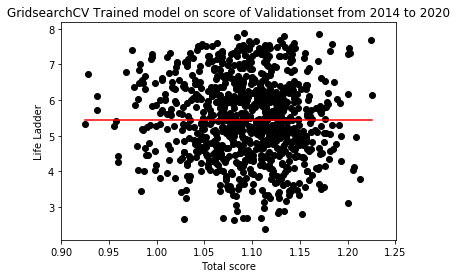

R2-score:  -0.002113778562697455
MSE:        1.2833598449364905


AttributeError: 'Pipeline' object has no attribute 'coef_'

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
## I checked if there were any other features which could be implemented, but most only become usefull if we are dealing with
## multidimensional spaces. So it is not


#traindata

complete_data_2007tot2013 = df_complete.loc[([2007,2008,2009,2010,2011,2012,2013],)]

#finding the outlier: complete_data_2007tot2013['Life Ladder'].idxmin() == (2013, 'Syrian Arab Republic')
complete_data_2007tot2013.drop((2013, 'Syrian Arab Republic'), axis=0, inplace=True)

y_as_life_ladder_train = complete_data_2007tot2013['Life Ladder'].values
x_as_score_total_train = complete_data_2007tot2013['score'].values

modelForGrid = make_pipeline(PolynomialFeatures(), LinearRegression())
grid = GridSearchCV(modelForGrid, param_grid, cv=5)
grid.fit(x_as_score_total_train[:, np.newaxis], y_as_life_ladder_train);


#testdata

complete_data_2014tot2020 = df_complete.loc[([2014, 2015, 2016, 2017, 2018, 2019, 2020],)]

#finding the outliers: complete_data_2014tot2020['score'].idxmin() == (2017, 'Lithuania')
complete_data_2014tot2020.drop((2017, 'Lithuania'), axis=0, inplace=True)

#finding the outliers complete_data_2014tot2020['score'].idxmin() == (2015,'Czechia')
complete_data_2014tot2020.drop((2015, 'Czechia'), axis=0, inplace=True)

y_as_life_ladder_test = complete_data_2014tot2020['Life Ladder'].values
x_as_score_total_test = complete_data_2014tot2020['score'].values

xfitline = np.linspace(min(x_as_score_total_test), max(x_as_score_total_test),919)
yfitline = grid.best_estimator_.predict(xfitline[:, np.newaxis])

# #plot
fig, ax = plt.subplots()
ax.scatter(x_as_score_total_test, y_as_life_ladder_test, c='black')
ax.set_xlabel("Total score")
ax.set_ylabel("Life Ladder")
ax.set_title("GridsearchCV Trained model on score of Validationset from 2014 to 2020")
ax.plot(xfitline, yfitline, c='red')
plt.show()


#resulting the best estimations for the parameters
#y_prediction_model = grid.best_estimator_.predict(x_as_score_neg_test[:, np.newaxis])
print("R2-score: ", r2_score(y_as_life_ladder_test, yfitline))
print("MSE:       ", mean_squared_error(y_as_life_ladder_test, yfitline))
print("Coefficient:", modelForGrid.coef_) #best_model.coef_
print("The optimal values for the given parameters are: ", grid.best_params_)
